# Taller de análisis exploratorio de los datos

En este taller se practicarán conceptos de análisis exploratorio de los datos, limpieza de datos y manejo de datos nulos vistos en la primera unidad del módulo 3 para el nivel explorador

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
# carga de los conjuntos de datos
df = pd.read_csv("../datasets/hurto_a_persona_transporte_publico.csv")
# Este dataset proviene de los datos abiertos de Colombia y contiene el registro de denuncias por hurto en el transporte público de la ciudad de Medellín.

In [67]:
df.sample(8)

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida
6899,2019-12-06T00:30:00.000-05:00,1.0,6.249840,-75.588953,Hombre,48,Casado(a),Sin dato,Sin dato,Sin dato,...,11,Bus de servicio público,Laureles,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato
5434,2019-09-06T14:30:00.000-05:00,1.0,6.212231,-75.577986,Hombre,31,Soltero(a),Sin dato,Sin dato,Sin dato,...,14,Metro Plus,Poblado,Celular,Tecnología,Mercancía,-1,Oro,Sin dato,Sin dato
4962,2019-08-05T07:15:00.000-05:00,1.0,6.244904,-75.565983,Hombre,42,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,10,Vía pública,Candelaria,Celular,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato
4316,2019-06-18T19:30:00.000-05:00,1.0,6.282030,-75.588972,Mujer,26,Soltero(a),Sin dato,Sin dato,Sin dato,...,7,Bus de servicio público,Castilla,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato
5710,2019-09-24T21:30:00.000-05:00,1.0,6.233806,-75.569066,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,10,Bus de servicio público,Candelaria,Celular,Tecnología,Mercancía,-1,Azul,Sin dato,Sin dato
9062,2020-09-14T06:30:00.000-05:00,1.0,6.226669,-75.572053,Mujer,44,Soltero(a),Sin dato,Sin dato,Sin dato,...,14,Almacén tienda y otro,Poblado,Celular,Tecnología,Mercancía,-1,Oro,Sin dato,Sin dato
2965,2019-03-09T19:30:00.000-05:00,1.0,6.246349,-75.566959,Mujer,22,Soltero(a),Sin dato,Sin dato,Sin dato,...,10,Paradero de bus,Candelaria,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato
16761,2022-02-14T01:00:00.000-05:00,1.0,6.211916,-75.578144,Mujer,46,Soltero(a),Sin dato,Sin dato,Sin dato,...,14,Estación del Metro,Poblado,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato


In [68]:
# Revisando el nombre de las columnas:
list(df.keys())

['fecha_hecho',
 'cantidad',
 'latitud',
 'longitud',
 'sexo',
 'edad',
 'estado_civil',
 'grupo_actor',
 'actividad_delictiva',
 'parentesco',
 'ocupacion',
 'discapacidad',
 'grupo_especial',
 'medio_transporte',
 'nivel_academico',
 'testigo',
 'conducta',
 'modalidad',
 'caracterizacion',
 'conducta_especial',
 'arma_medio',
 'articulo_penal',
 'categoria_penal',
 'nombre_barrio',
 'codigo_barrio',
 'codigo_comuna',
 'lugar',
 'sede_receptora',
 'bien',
 'categoria_bien',
 'grupo_bien',
 'modelo',
 'color',
 'permiso',
 'unidad_medida']

In [69]:
# mirando los tipos de datos de las columnas
tipos = pd.DataFrame(df.dtypes)
print(tipos)

                           0
fecha_hecho           object
cantidad             float64
latitud              float64
longitud             float64
sexo                  object
edad                   int64
estado_civil          object
grupo_actor           object
actividad_delictiva   object
parentesco            object
ocupacion             object
discapacidad          object
grupo_especial        object
medio_transporte      object
nivel_academico       object
testigo               object
conducta              object
modalidad             object
caracterizacion       object
conducta_especial     object
arma_medio            object
articulo_penal        object
categoria_penal       object
nombre_barrio         object
codigo_barrio         object
codigo_comuna         object
lugar                 object
sede_receptora        object
bien                  object
categoria_bien        object
grupo_bien            object
modelo                 int64
color                 object
permiso       

In [70]:
# mirando las variables aleatorias
df.describe(include=["number"])

,cantidad,latitud,longitud,edad,modelo
count,27022.0,24594.000000,24594.000000,27022.000000,27022.000000
mean,1.0,6.247312,-75.574967,35.497484,-0.777071
std,0.0,0.024825,0.015213,13.072794,21.156783
min,1.0,6.092238,-75.692301,-1.000000,-1.000000
25%,1.0,6.233437,-75.581104,25.000000,-1.000000
50%,1.0,6.247840,-75.571174,33.000000,-1.000000
75%,1.0,6.260760,-75.566819,44.000000,-1.000000
max,1.0,6.344199,-75.489218,91.000000,2009.000000


Al revisar el describe, vemos que la edad tiene valores como -1 y que cantidad tiene 1 en cada registro, es decir, cada fila modela el hurto de una cosa (o un grupo) esto se ve en que la media, el mínimo y el máximo son 1.0 y la desviación estándar es cero. Podemos eliminar esa columna ya que no aporta información.


In [71]:
df.describe(include=['object'])

,fecha_hecho,sexo,estado_civil,grupo_actor,actividad_delictiva,parentesco,ocupacion,discapacidad,grupo_especial,medio_transporte,...,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,color,permiso,unidad_medida
count,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,...,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022
unique,17562,3,6,1,1,1,1,1,1,3,...,341,22,71,20,190,36,5,16,1,1
top,2019-04-23T07:30:00.000-05:00,Hombre,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Autobus,...,#1019,10,Estación del Metro,Candelaria,Celular,Tecnología,Mercancía,Sin dato,Sin dato,Sin dato
freq,15,13840,14517,27022,27022,27022,27022,27022,27022,10531,...,4185,10187,7426,10325,12131,13509,24994,16693,27022,27022


al hacer el análisis de los objetos (columnas con texto u otros datos) apreciamos que hay columnas con un solo registro único ( es decir, el mismo valor se repite para todas las filas). En este caso no aportan información, por lo que son eliminables.

En general estos problemas suceden durante la captura de los datos, seguramente existe un formulario que permite llenar los datos con campos vacíos y en el conjunto de datos se guarda el texto `Sin dato` que es lo que se ve en el conjunto de datos
Tambien eliminaremos latitud y longitud. Si bien contienen información interesante, ya que no estamos empleando datos geolocalizados ni dataframes que permitan funciones geolocalizadas, omitiremos la información por ahora y nos limitaremos a los nombres de los barrios

In [72]:
columnas_eliminar = ["grupo_actor", "actividad_delictiva", "parentesco", "ocupacion", "nivel_academico",
                     "testigo", "conducta", "caracterizacion", "articulo_penal", "categoria_penal", "permiso", "unidad_medida", "cantidad", "latitud", "longitud", "grupo_especial", "discapacidad"]
df2 = df.drop(columnas_eliminar, axis="columns")

In [73]:
df2.describe(include="object")

,fecha_hecho,sexo,estado_civil,medio_transporte,modalidad,conducta_especial,arma_medio,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,color
count,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022,27022
unique,17562,3,6,3,20,14,6,315,341,22,71,20,190,36,5,16
top,2019-04-23T07:30:00.000-05:00,Hombre,Soltero(a),Autobus,Cosquilleo,Sin dato,No,La Candelaria,#1019,10,Estación del Metro,Candelaria,Celular,Tecnología,Mercancía,Sin dato
freq,15,13840,14517,10531,13670,18911,17751,4185,4185,10187,7426,10325,12131,13509,24994,16693


In [74]:
# Ahora revisamos qué tamaño tiene el dataset y si hay nulos
print(f"El dataset contiene {df2.shape[0]} filas x {df2.shape [1]} columnas")

El dataset contiene 27022 filas x 18 columnas


In [75]:
# revisando los que tienen valores nulos.
df2.isna().sum()

fecha_hecho          0
sexo                 0
edad                 0
estado_civil         0
medio_transporte     0
modalidad            0
conducta_especial    0
arma_medio           0
nombre_barrio        0
codigo_barrio        0
codigo_comuna        0
lugar                0
sede_receptora       0
bien                 0
categoria_bien       0
grupo_bien           0
modelo               0
color                0
dtype: int64

Text(0.5, 1.0, 'Hurtos por genero')

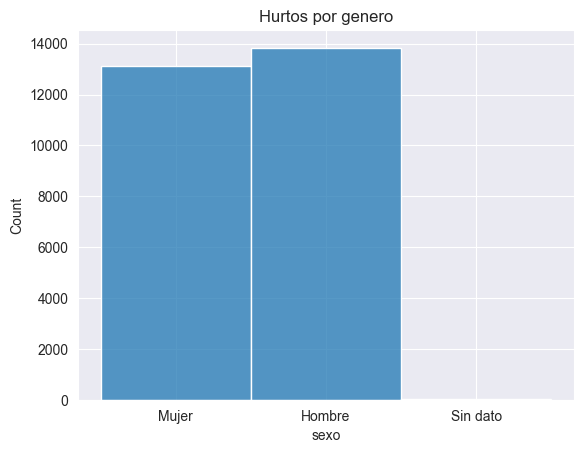

In [76]:
# revisando hurtos por género
sns.histplot(df2["sexo"])
plt.title("Hurtos por genero")

Text(0.5, 1.0, 'Arma empleada en el hurto')

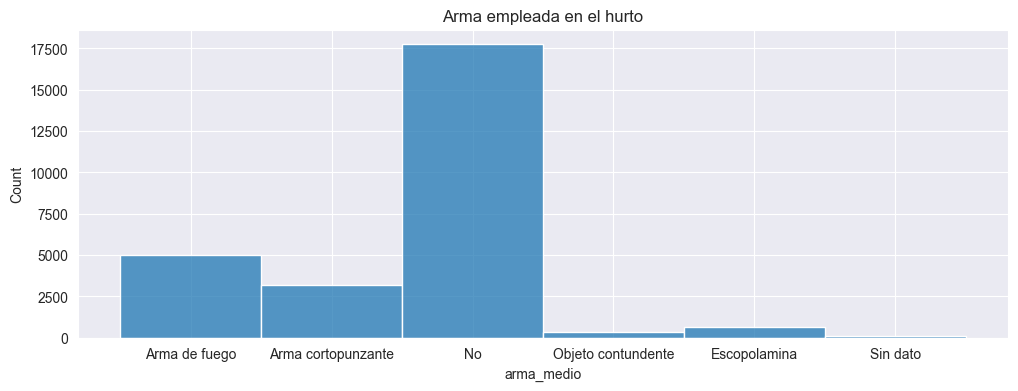

In [77]:
# Revisando la frecuencia del arma empleada para los hurtos
plt.subplots(figsize=(12,4))
sns.histplot(df2["arma_medio"])
plt.title("Arma empleada en el hurto")

Se aprecia que la mayoría de robos son sin emplear armas. En segundo lugar se usan armas de fuego para el hurto

modalidad
Cosquilleo                13670
Atraco                     9140
Descuido                   2231
Raponazo                   1110
Escopolamina                420
Engaño                      170
Sin dato                     74
Comisión de delito           73
Rompimiento cerraduta        46
Fleteo                       41
Halado                       10
Simulando necesidad           9
Suplantación                  6
Miedo o terror                6
Clonación de tarjeta          4
Rompimiento de ventana        4
Llamada millonaria            4
Forcejeo                      2
Rompimiento cerradura         1
Retención de tarjeta          1
Name: count, dtype: int64

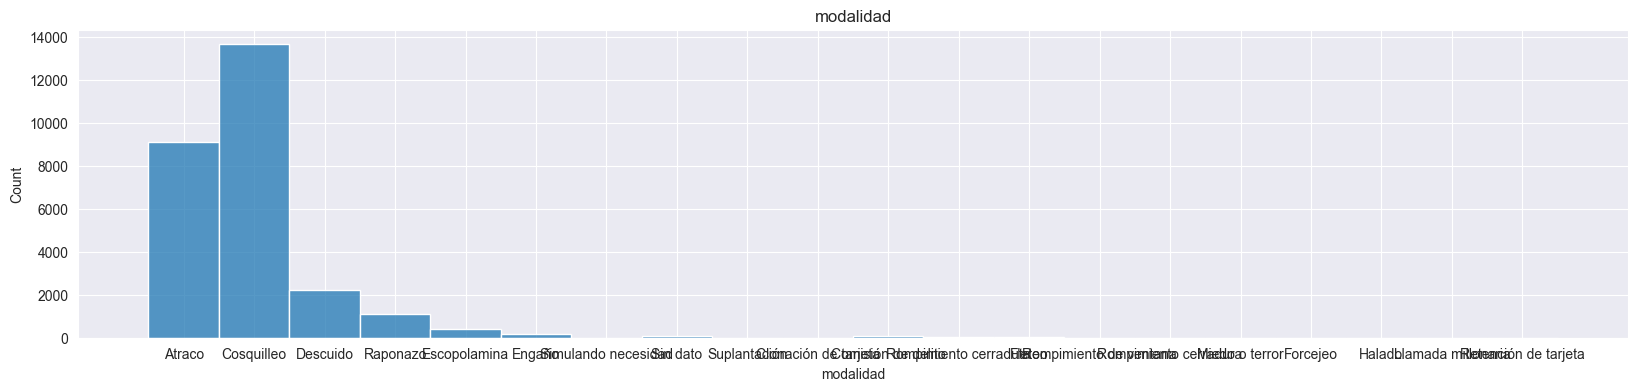

In [78]:
plt.subplots(figsize=(20,4))
sns.histplot(df2["modalidad"])
plt.title("modalidad")
# contando cuantas modalidades hay y cuantos valores hay por modalidad
df2["modalidad"].value_counts()

arma_medio
Arma de fuego         4879
Arma cortopunzante    3145
No                     667
Objeto contundente     238
Escopolamina           201
Sin dato                10
Name: count, dtype: int64


<Axes: xlabel='arma_medio', ylabel='Count'>

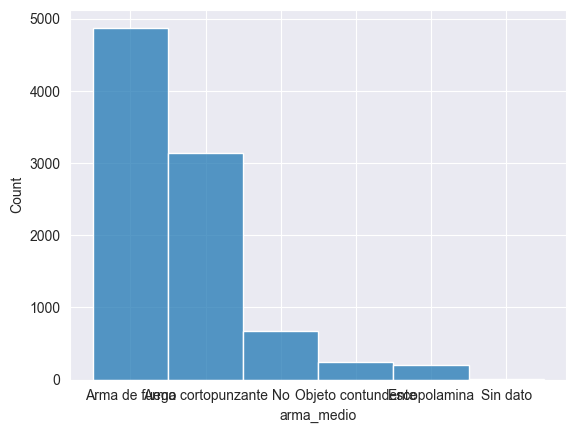

In [79]:
# ¿con qué arma se realizan los atracos?
atracos = df2[df2["modalidad"] == "Atraco"]
print(atracos["arma_medio"].value_counts())
sns.histplot(atracos["arma_medio"])

arma_medio
Arma de fuego         4879
Arma cortopunzante    3145
No                     667
Objeto contundente     238
Escopolamina           201
Sin dato                10
Name: count, dtype: int64


<Axes: xlabel='arma_medio', ylabel='Count'>

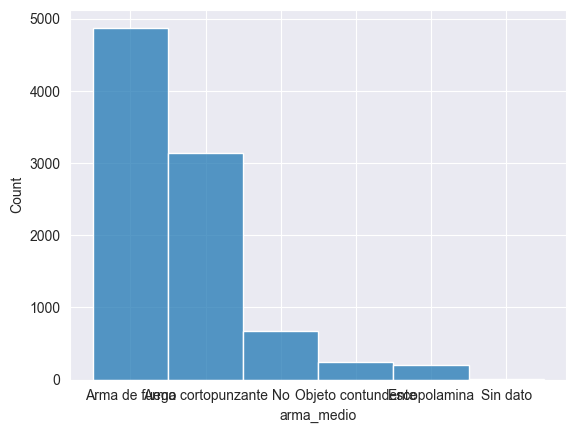

In [80]:
# ¿con qué arma se realizan los atracos?
atracos = df2[df2["modalidad"] == "Atraco"]
print(atracos["arma_medio"].value_counts())
sns.histplot(atracos["arma_medio"])

In [82]:
# Ejercicios a realizar:
# 1. Analizar los hurtos para el último año en el conjunto de datos (esto implica procesar los datos para extraer las fechas)
# 2. Revisar qué barrios son los que tienen mayores hurtos
# 3. Encontrar los cinco objetos mas frecuentes en los hurtos
# 4. Para los objetos más frecuentes, encontrar qué modalidad de hurto tuvieron.